In [2]:
import numpy as np
import pandas as pd
## Read in dataset
df = pd.read_csv('CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv')
df.head()

,station_id,stationname,date,daytype,rides
0,40850,Library,10/09/2004,A,1057
1,40780,Central Park,06/18/2010,W,1154
2,41500,Montrose-Brown,10/30/2001,W,2116
3,40500,Washington/State,10/26/2006,W,0
4,41090,Monroe/State,07/07/2010,W,9431


In [3]:
## Exploratory Data Analysis: Station_IDs
### Number of station_IDs, number of unique station_ids, min, max
len(df.station_id), len(np.unique(df.station_id)), min(df.station_id), max(df.station_id)

(962546, 147, 40010, 41700)

In [4]:
## Average number of apperances per station
len(df.station_id)/len(np.unique(df.station_id))

6547.931972789115

In [5]:
import datetime as dt
## Convert date column to datetime
df['datetime'] = pd.to_datetime(df['date'])
df.head()

,station_id,stationname,date,daytype,rides,datetime
0,40850,Library,10/09/2004,A,1057,2004-10-09
1,40780,Central Park,06/18/2010,W,1154,2010-06-18
2,41500,Montrose-Brown,10/30/2001,W,2116,2001-10-30
3,40500,Washington/State,10/26/2006,W,0,2006-10-26
4,41090,Monroe/State,07/07/2010,W,9431,2010-07-07


In [6]:
## Date
min(df.datetime), max(df.datetime), (max(df.datetime) - min(df.datetime)).days

## 6754(number of total days in timeframe) is close to 6547(avg number of appearences per station)

(Timestamp('2001-01-01 00:00:00'), Timestamp('2019-06-30 00:00:00'), 6754)

In [7]:
## Daytype: groupby count
df.groupby('daytype').count()['rides']
## Roughly 5:1:1 as we expect it to be (Weekdays: Saturday: Sunday)

daytype
A    136947
U    153187
W    672412
Name: rides, dtype: int64

In [8]:
## Daytype: Confirm suspected 5:1:1 ratio above
df.groupby('daytype').count()['rides']/df.groupby('daytype').count()['rides']['A']

daytype
A    1.000000
U    1.118586
W    4.910016
Name: rides, dtype: float64

In [9]:
## Daytype: total rides by daytype
df.groupby('daytype').sum()['rides']
## Just by looking at the numbers, a lot more rides on Weekdays per day than weekends/holidays

daytype
A     311540838
U     252728696
W    2629836086
Name: rides, dtype: int64

In [10]:
## For exact ratio of the above:
df.groupby('daytype').sum()['rides']/df.groupby('daytype').sum()['rides']['A']
## Roughly 8.5:1:1, meaning there's more traffic on average on weekdays, as expected

daytype
A    1.000000
U    0.811222
W    8.441385
Name: rides, dtype: float64

(array([6.55161e+05, 2.06255e+05, 6.43860e+04, 2.46210e+04, 7.66100e+03,
        3.33700e+03, 1.08500e+03, 3.10000e+01, 4.00000e+00, 5.00000e+00]),
 array([    0. ,  3632.3,  7264.6, 10896.9, 14529.2, 18161.5, 21793.8,
        25426.1, 29058.4, 32690.7, 36323. ]),
 <a list of 10 Patch objects>)

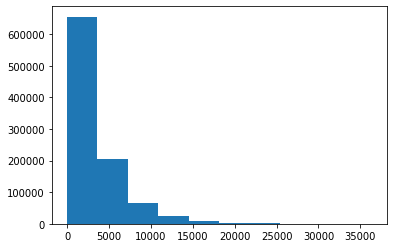

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
## Rides: distribution
plt.hist(df.rides)
## A long tailed distribution, which makes sense. Stations with high traffic will have much higher tallies than
## stations with low traffic. Lets take a closer look

(array([341634., 235691., 157207.,  81037.,  53653.,  33460.,  19190.,
         13293.,   9900.,   7231.]),
 array([    0.,  1500.,  3000.,  4500.,  6000.,  7500.,  9000., 10500.,
        12000., 13500., 15000.]),
 <a list of 10 Patch objects>)

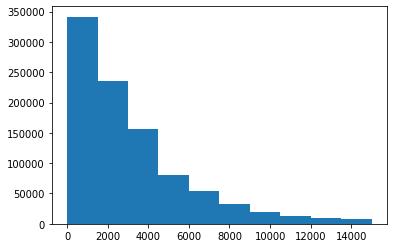

In [12]:
plt.hist(df.rides, range = (0,15000))
## Still long-tailed

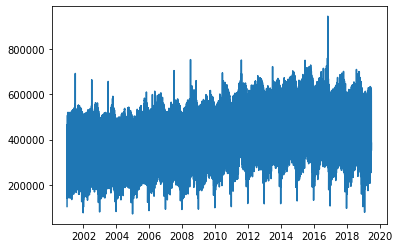

In [13]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
## Rides over time
plt.plot(df.groupby('datetime').sum()['rides'])
## This is kind of hard to see, can we do better?

In [14]:
## Lets try grouping by the year/month. First, lets get a column it
df['yearmonth'] = df.datetime.apply(lambda x: str(x.year)[2:] + '/' + str(x.month))
df.head()

,station_id,stationname,date,daytype,rides,datetime,yearmonth
0,40850,Library,10/09/2004,A,1057,2004-10-09,04/10
1,40780,Central Park,06/18/2010,W,1154,2010-06-18,10/6
2,41500,Montrose-Brown,10/30/2001,W,2116,2001-10-30,01/10
3,40500,Washington/State,10/26/2006,W,0,2006-10-26,06/10
4,41090,Monroe/State,07/07/2010,W,9431,2010-07-07,10/7


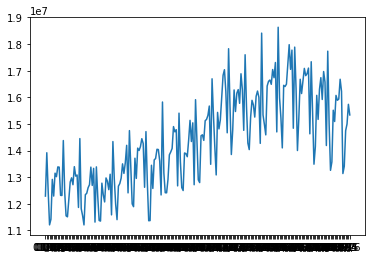

In [15]:
## Now lets aggregate and plot
plt.plot(df.groupby('yearmonth').sum()['rides'])

## This confirms what we saw previously, a steadily rising then declining pattern with seasonality
## Lets zoom in on a couple years just to make sure of the seasonality

In [16]:
## For convenience lets make "year" and "month" columns
df['year'] = df.datetime.apply(lambda x: x.year)
df['month'] = df.datetime.apply(lambda x: x.month)
df.head()

,station_id,stationname,date,daytype,rides,datetime,yearmonth,year,month
0,40850,Library,10/09/2004,A,1057,2004-10-09,04/10,2004,10
1,40780,Central Park,06/18/2010,W,1154,2010-06-18,10/6,2010,6
2,41500,Montrose-Brown,10/30/2001,W,2116,2001-10-30,01/10,2001,10
3,40500,Washington/State,10/26/2006,W,0,2006-10-26,06/10,2006,10
4,41090,Monroe/State,07/07/2010,W,9431,2010-07-07,10/7,2010,7


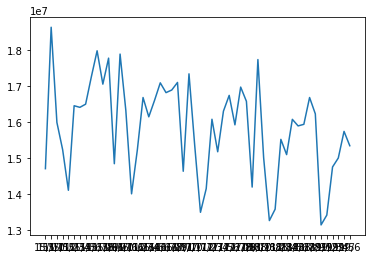

In [17]:
## Okay now lets look at the last 5 years, when rides appear to be in the decline phase
plt.plot(df[df['year']>=2015].groupby('yearmonth').sum()['rides'])

In [18]:
## Let's set up the training data for the model
sub_df = df[df['year'] < 2017]
data = sub_df.groupby('datetime').sum()['rides']
data.head()

datetime
2001-01-01    105608
2001-01-02    419202
2001-01-03    447997
2001-01-04    459338
2001-01-05    465940
Name: rides, dtype: int64

In [19]:
## Make dataset prophet-ready
data = pd.DataFrame(data).reset_index().rename(columns={'datetime': 'ds', 'rides': 'y'})
data.head()

,ds,y
0,2001-01-01,105608
1,2001-01-02,419202
2,2001-01-03,447997
3,2001-01-04,459338
4,2001-01-05,465940


In [20]:
## Let's use gridsearch to tune the parameters of the model

from fbprophet import Prophet
from sklearn.model_selection import ParameterGrid

params_grid = {'changepoint_prior_scale':[0.01, 0.05, 0.1], ## how frequently to detect changes in trend
               'changepoint_range' : [0.8, 0.9], ## how long the model can go before detecting change in trend is prohibited
               'holidays' : ['yes', 'no']} ## whether or not to incorporate holidays in the model
grid = ParameterGrid(params_grid)

preds = pd.DataFrame(df[df['year'] == 2017].groupby('datetime').sum()['rides'])

model_num = 1 ## This will be the model_ID
model_dict = {} ## This is a dictionary to keep track of what the model parameters corresponding to the model_ID are
for p in grid:
    holidays = pd.DataFrame(columns = ['ds', 'holiday'])
    if p['holidays'] == 'yes':
        model = Prophet(changepoint_prior_scale = p['changepoint_prior_scale'], changepoint_range = p['changepoint_range'],
                       holidays=holidays)
        model.add_country_holidays(country_name='US') ## built-in dataframe of US holidays
    else:
        model = Prophet(changepoint_prior_scale = p['changepoint_prior_scale'], changepoint_range = p['changepoint_range'])
    model.fit(data)
    fitted = model.make_future_dataframe(periods=365)
    forecast = pd.Series(model.predict(fitted)['yhat'][-365:].values, index = preds.index)
    model_id = 'model_' + str(model_num)
    if p['holidays'] == 'yes':
        model_dict[model_num] = str(p['changepoint_prior_scale']) + '|' + str(p['changepoint_range']) + '|' + 'yes'
    else:
        model_dict[model_num] = str(p['changepoint_prior_scale']) + '|' + str(p['changepoint_range']) + '|' + 'no'
    preds[model_id] = forecast
    model_num += 1
    
preds.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:D

,rides,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12
datetime,,,,,,,,,,,,,
2017-12-27,342710,541149.842851,518943.074089,537558.315085,518605.289802,540668.166400,513174.187971,515730.170196,498355.997341,540639.616146,513311.886764,512579.086791,488148.151534
2017-12-28,376152,544244.344941,512868.591988,540635.012320,512532.376610,543736.640498,507062.001309,518731.742987,492201.111630,543707.771397,507196.070782,515566.206159,481960.301279
2017-12-29,384599,538830.005343,513027.766703,535208.735871,512693.426340,538294.994429,507182.137252,513223.233106,492277.496805,538266.752346,507312.436978,510044.344498,482002.877495
2017-12-30,225685,307859.679910,283406.018616,304224.020257,283065.284498,307307.807837,277512.846998,282161.521957,262563.526717,307277.258682,277639.102287,278966.045795,252254.431412
2017-12-31,193919,223242.711619,198201.560036,219590.887105,197860.227205,222664.488901,192260.913144,197431.299331,177257.292624,222633.815827,192382.910699,194219.527595,166907.678808


In [21]:
## Let's do some quick error calculation, mean absolute error and mean squared error
from sklearn import metrics
mae = pd.Series()
mse = pd.Series()
for i in range(1, model_num):
    string_model = 'model_' + str(i)
    mae[string_model] = metrics.mean_absolute_error(preds['rides'], preds[string_model])
    mse[string_model] = metrics.mean_squared_error(preds['rides'], preds[string_model])



In [22]:
## Model_11 produces the smallest error by MAE
mae.sort_values()

model_11    26516.476268
model_7     26825.708643
model_12    32929.270912
model_3     34087.886453
model_8     34093.480014
model_5     35682.047546
model_9     35696.956286
model_1     36096.110331
model_6     38425.704924
model_10    38481.048444
model_4     40967.831259
model_2     41118.554964
dtype: float64

In [23]:
## Model_11 produces the smallest error by MSE
mse.sort_values()

model_11    1.775258e+09
model_7     1.830550e+09
model_3     2.527290e+09
model_5     2.665472e+09
model_9     2.665814e+09
model_1     2.697353e+09
model_12    3.380262e+09
model_8     3.619012e+09
model_6     4.190150e+09
model_10    4.197710e+09
model_4     4.503479e+09
model_2     4.521940e+09
dtype: float64

In [24]:
## Tabulate errors
errors = pd.DataFrame(mae, columns = ['mae'])
errors['mse'] = mse
errors

,mae,mse
model_1,36096.110331,2.697353e+09
model_2,41118.554964,4.521940e+09
model_3,34087.886453,2.527290e+09
model_4,40967.831259,4.503479e+09
model_5,35682.047546,2.665472e+09
model_6,38425.704924,4.190150e+09
model_7,26825.708643,1.830550e+09
model_8,34093.480014,3.619012e+09
model_9,35696.956286,2.665814e+09
model_10,38481.048444,4.197710e+09


In [25]:
## The parameters for the best grid model: 0.1|0.9|use holidays
model_dict[11]

'0.1|0.9|yes'

In [26]:
## Let's get some visualizations on what the bestr model entails

from fbprophet import Prophet
holidays = pd.DataFrame(columns = ['ds', 'holiday'])
model = Prophet(changepoint_prior_scale = 0.1, changepoint_range = 0.9, holidays = holidays)
model.add_country_holidays(country_name='US') ## built-in dataframe of us holidays
model.fit(data)

forecast = model.make_future_dataframe(periods=365)
forecast = model.predict(forecast)
forecast.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
6204,2017-12-27,529518.717541,462479.990998,560115.533154,520800.948351,537051.564425,0.0,0.0,0.0,0.0,...,80990.538560,80990.538560,80990.538560,-97930.169310,-97930.169310,-97930.169310,0.0,0.0,0.0,512579.086791
6205,2017-12-28,529496.049303,468893.262846,562547.017149,520775.724083,537061.435401,0.0,0.0,0.0,0.0,...,85121.326276,85121.326276,85121.326276,-99051.169421,-99051.169421,-99051.169421,0.0,0.0,0.0,515566.206159
6206,2017-12-29,529473.381066,466341.561714,555434.728790,520750.499814,537072.788101,0.0,0.0,0.0,0.0,...,80021.985999,80021.985999,80021.985999,-99451.022567,-99451.022567,-99451.022567,0.0,0.0,0.0,510044.344498
6207,2017-12-30,529450.712829,234122.419901,326800.958010,520725.275546,537122.921872,0.0,0.0,0.0,0.0,...,-151361.517750,-151361.517750,-151361.517750,-99123.149284,-99123.149284,-99123.149284,0.0,0.0,0.0,278966.045795
6208,2017-12-31,529428.044592,148683.349500,239716.502195,520684.702024,537173.055644,0.0,0.0,0.0,0.0,...,-237134.640228,-237134.640228,-237134.640228,-98073.876768,-98073.876768,-98073.876768,0.0,0.0,0.0,194219.527595


In [27]:
## Holidays used
model.train_holiday_names

0                  New Year's Day
1     Martin Luther King, Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Columbus Day
7                    Veterans Day
8                    Thanksgiving
9                   Christmas Day
10       Christmas Day (Observed)
11        Veterans Day (Observed)
12      New Year's Day (Observed)
13    Independence Day (Observed)
dtype: object

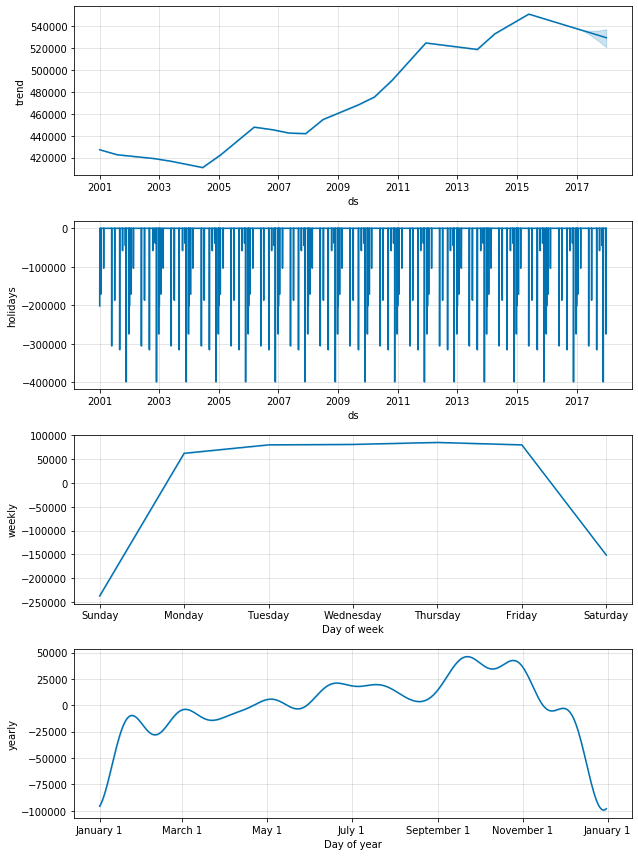

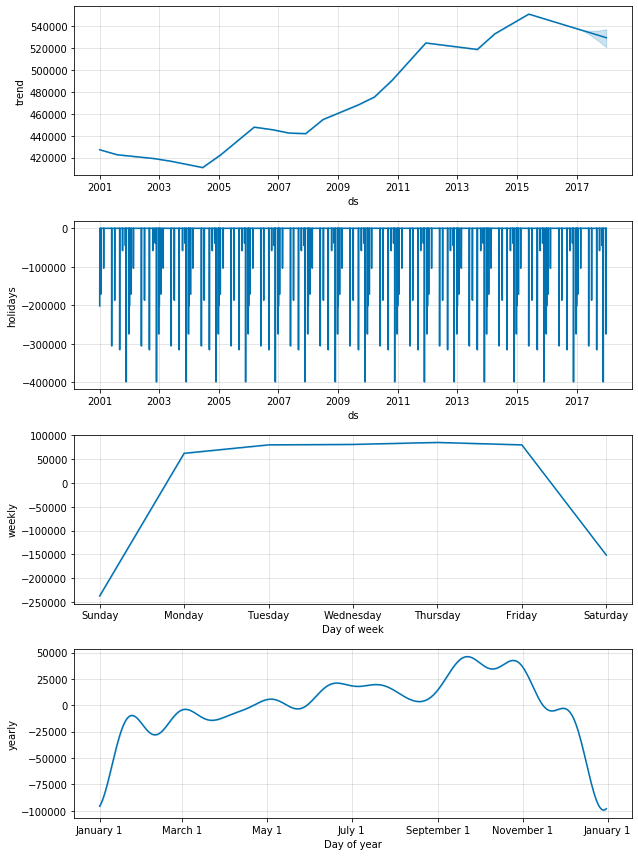

In [28]:
## Decomposition of model into trend, seasonalities
model.plot_components(forecast)

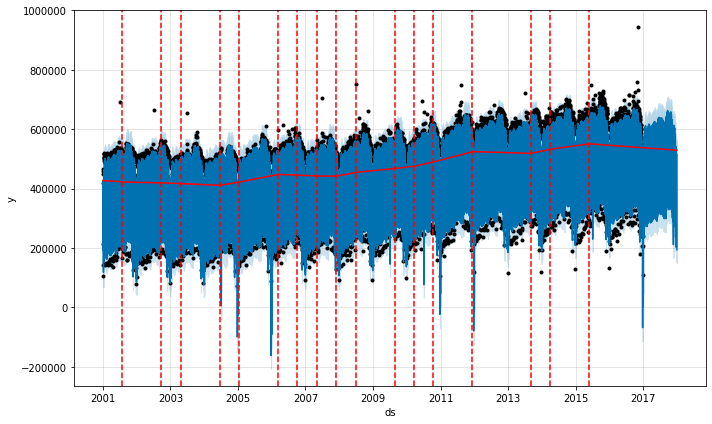

In [29]:
## Plot forecast
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

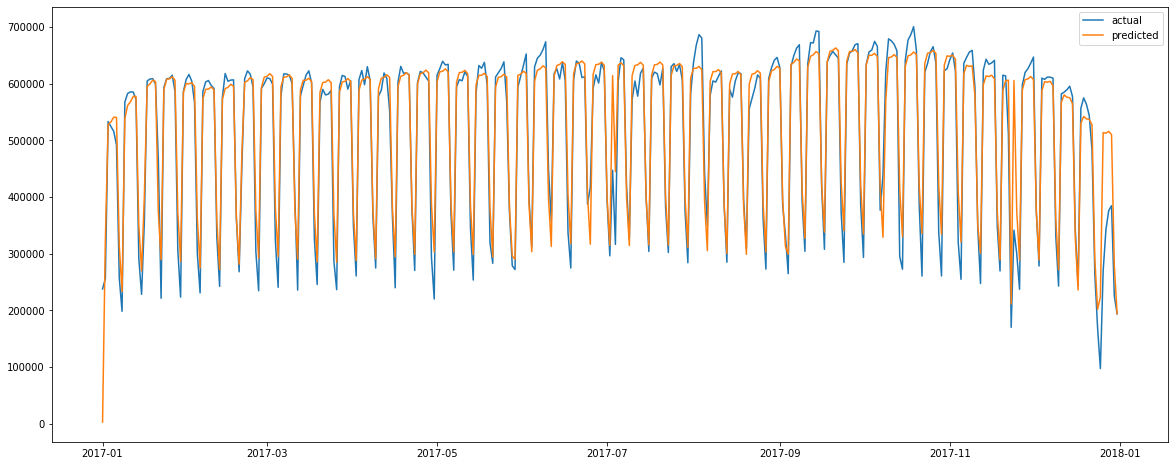

In [30]:
## Visualize predictions vs. actual
plt.figure(figsize=(20,8))
plt.plot(preds['rides'], label = 'actual')
plt.plot(preds['model_11'], label = 'predicted')
plt.legend()
plt.show()
## It seems like the predictions are underpredicting the peaks and overpredicting the valleys a bit

In [31]:
## Let's try changing the training set
## Would it help just to use 2015-2016 data because a declining trend appears to have started during that time
sub_df = df[(df['year'] == 2015) | (df['year'] == 2016)]
data = sub_df.groupby('datetime').sum()['rides']
data.head()

datetime
2015-01-01    233956
2015-01-02    432144
2015-01-03    273207
2015-01-04    217632
2015-01-05    538868
Name: rides, dtype: int64

In [32]:
## Make dataset prophet-ready
data = pd.DataFrame(data).reset_index().rename(columns={'datetime': 'ds', 'rides': 'y'})
data.head()

,ds,y
0,2015-01-01,233956
1,2015-01-02,432144
2,2015-01-03,273207
3,2015-01-04,217632
4,2015-01-05,538868


In [33]:
## Let's use gridsearch to tune the parameters of the model

from fbprophet import Prophet
from sklearn.model_selection import ParameterGrid

params_grid = {'changepoint_prior_scale':[0.01, 0.05, 0.1], ## how frequently to detect changes in trend
               'changepoint_range' : [0.8, 0.9], ## how long the model can go before detecting change in trend is prohibited
               'holidays' : ['yes', 'no']} ## whether or not to incorporate holidays in the model
grid = ParameterGrid(params_grid)

preds_short = pd.DataFrame(df[df['year'] == 2017].groupby('datetime').sum()['rides'])

model_num = 1 ## This will be the model_ID
model_dict = {} ## This is a dictionary to keep track of what the model parameters corresponding to the model_ID are
for p in grid:
    holidays = pd.DataFrame(columns = ['ds', 'holiday'])
    if p['holidays'] == 'yes':
        model = Prophet(changepoint_prior_scale = p['changepoint_prior_scale'], changepoint_range = p['changepoint_range'],
                       holidays=holidays)
        model.add_country_holidays(country_name='US') ## built-in dataframe of US holidays
    else:
        model = Prophet(changepoint_prior_scale = p['changepoint_prior_scale'], changepoint_range = p['changepoint_range'])
    model.fit(data)
    fitted = model.make_future_dataframe(periods=365)
    forecast = pd.Series(model.predict(fitted)['yhat'][-365:].values, index = preds.index)
    model_id = 'model_' + str(model_num)
    if p['holidays'] == 'yes':
        model_dict[model_num] = str(p['changepoint_prior_scale']) + '|' + str(p['changepoint_range']) + '|' + 'yes'
    else:
        model_dict[model_num] = str(p['changepoint_prior_scale']) + '|' + str(p['changepoint_range']) + '|' + 'no'
    preds_short[model_id] = forecast
    model_num += 1
    
preds_short.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:D

,rides,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12
datetime,,,,,,,,,,,,,
2017-12-27,342710,479548.675292,460836.530023,476142.357685,461585.003219,472598.717250,447321.724785,472330.433171,448552.898528,472129.480874,444585.594276,472999.224423,445056.053308
2017-12-28,376152,482280.378191,451974.482687,478992.990028,452688.672762,475554.893262,438709.558468,475246.183608,439935.794850,475055.208441,435969.166821,475942.688573,436464.686435
2017-12-29,384599,475535.083718,448521.316181,472186.188529,449210.261541,469188.162721,435414.009278,468882.974396,436640.909291,468756.032518,432663.751211,469662.791952,433179.542563
2017-12-30,225685,226739.386437,204148.094238,223630.819612,204799.009545,220468.029097,191198.766758,220105.172488,192423.312127,220007.128689,188403.330623,220996.027695,188972.490669
2017-12-31,193919,135570.727228,111304.988300,132570.521908,111914.864255,129503.920983,98472.635794,129104.358890,99703.719617,129040.314449,95660.558898,130072.105164,96253.313079


In [34]:
## Let's do some quick error calculation, mean absolute error and mean squared error
from sklearn import metrics

mae = pd.Series()
mse = pd.Series()
for i in range(1, model_num):
    string_model = 'model_' + str(i)
    mae[string_model] = metrics.mean_absolute_error(preds_short['rides'], preds_short[string_model])
    mse[string_model] = metrics.mean_squared_error(preds_short['rides'], preds_short[string_model])

In [35]:
## Model_1 produces the smallest error by MAE
mae.sort_values()

model_1     26362.068702
model_3     26417.803561
model_11    26817.707076
model_5     26859.063638
model_7     26903.068284
model_9     26961.590806
model_4     33386.851665
model_2     33390.333130
model_8     34469.701788
model_6     34649.826397
model_12    35057.924034
model_10    35160.210013
dtype: float64

In [36]:
## Model_11 produces the smallest error by MSE
mse.sort_values()

model_11    1.905653e+09
model_5     1.907350e+09
model_9     1.909353e+09
model_7     1.910334e+09
model_3     1.916505e+09
model_1     1.940962e+09
model_8     3.159385e+09
model_6     3.162522e+09
model_12    3.174128e+09
model_10    3.177552e+09
model_2     3.228306e+09
model_4     3.236414e+09
dtype: float64

In [37]:
## Tabulate errors
errors = pd.DataFrame(mae, columns = ['mae'])
errors['mse'] = mse
errors

,mae,mse
model_1,26362.068702,1.940962e+09
model_2,33390.333130,3.228306e+09
model_3,26417.803561,1.916505e+09
model_4,33386.851665,3.236414e+09
model_5,26859.063638,1.907350e+09
model_6,34649.826397,3.162522e+09
model_7,26903.068284,1.910334e+09
model_8,34469.701788,3.159385e+09
model_9,26961.590806,1.909353e+09
model_10,35160.210013,3.177552e+09


In [38]:
## I'm going to go by MSE in this case because it penalizes large errors more
## The parameters for the best grid model: 0.1|0.9|use holidays
model_dict[11]

'0.1|0.9|yes'

In [39]:
## Let's get some visualizations on what the best model entails

from fbprophet import Prophet
holidays = pd.DataFrame(columns = ['ds', 'holiday'])
model = Prophet(changepoint_prior_scale = 0.1, changepoint_range = 0.9, holidays = holidays)
model.add_country_holidays(country_name='US') ## built-in dataframe of us holidays
model.fit(data)

forecast = model.make_future_dataframe(periods=365)
forecast = model.predict(forecast)
forecast.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1091,2017-12-27,511723.520524,422248.229371,519878.634683,504681.481142,519361.815147,0.0,0.0,0.0,0.0,...,85641.509299,85641.509299,85641.509299,-124365.805400,-124365.805400,-124365.805400,0.0,0.0,0.0,472999.224423
1092,2017-12-28,511671.134187,425064.213796,525141.605544,504609.197989,519344.469451,0.0,0.0,0.0,0.0,...,91157.464158,91157.464158,91157.464158,-126885.909772,-126885.909772,-126885.909772,0.0,0.0,0.0,475942.688573
1093,2017-12-29,511618.747850,418783.209038,519938.743266,504536.914837,519327.123756,0.0,0.0,0.0,0.0,...,86505.399852,86505.399852,86505.399852,-128461.355750,-128461.355750,-128461.355750,0.0,0.0,0.0,469662.791952
1094,2017-12-30,511566.361513,169307.137745,271184.105829,504463.239632,519309.408465,0.0,0.0,0.0,0.0,...,-161513.065243,-161513.065243,-161513.065243,-129057.268575,-129057.268575,-129057.268575,0.0,0.0,0.0,220996.027695
1095,2017-12-31,511513.975176,82944.006962,177246.644271,504378.289320,519276.832714,0.0,0.0,0.0,0.0,...,-252785.475401,-252785.475401,-252785.475401,-128656.394610,-128656.394610,-128656.394610,0.0,0.0,0.0,130072.105164


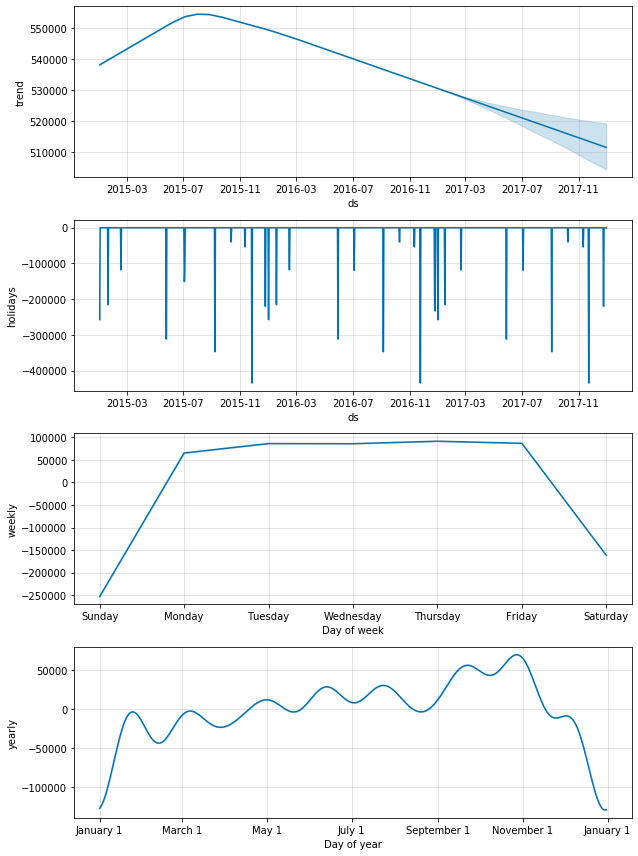

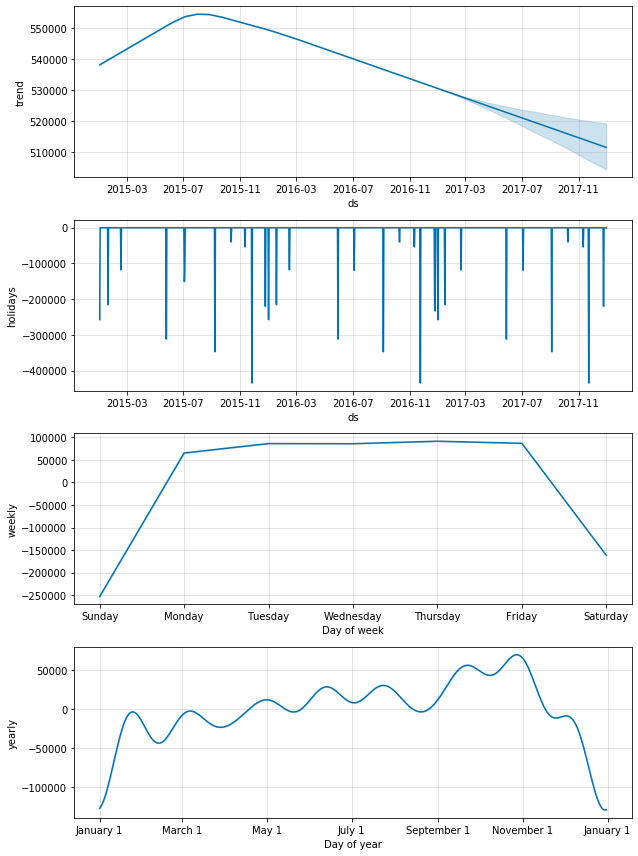

In [40]:
## Decomposition of model into trend, seasonalities
model.plot_components(forecast)

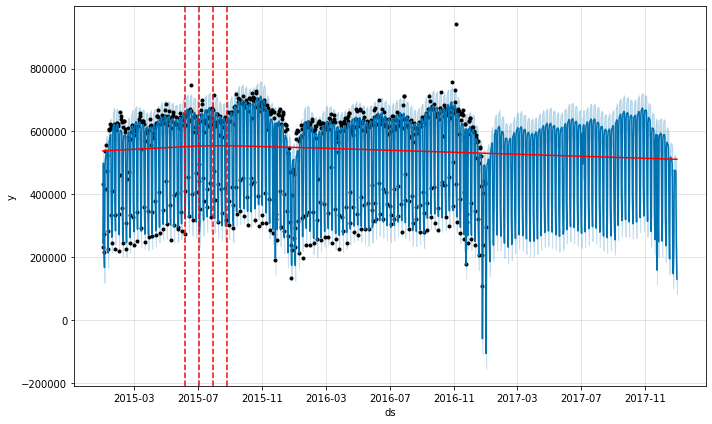

In [41]:
## Plot forecast
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

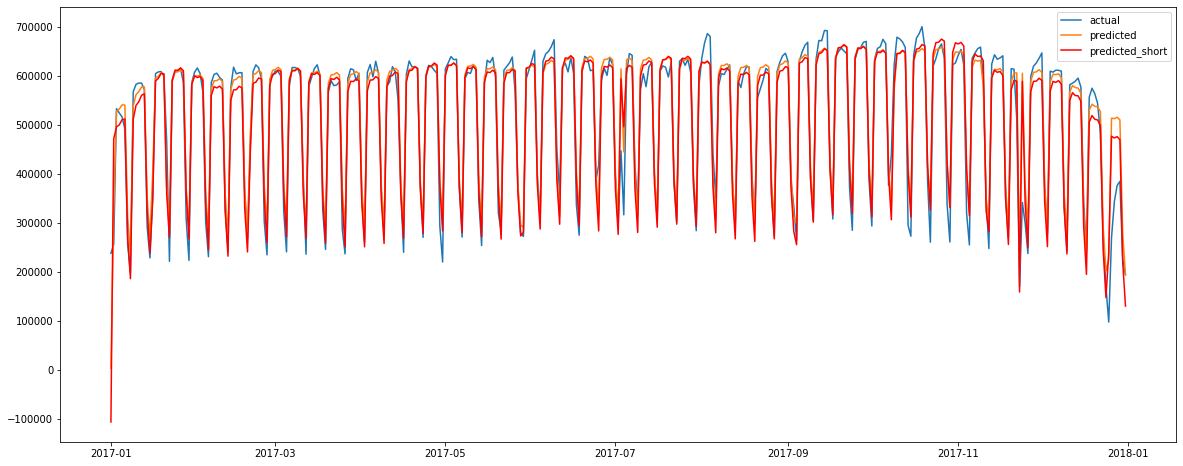

In [42]:
## Visualize predictions vs. actual
plt.figure(figsize=(20,8))
plt.plot(preds_short['rides'], label = 'actual')
plt.plot(preds['model_11'], label = 'predicted')
plt.plot(preds_short['model_11'], label = 'predicted_short', color = 'red')
plt.legend()
plt.show()
## It seems like the predictions are underpredicting the peaks and overpredicting the valleys a bit